# Data Visualization Exercise

For this exercise, use your creativity and understanding of the different concepts of data visualization.

Create a plot (or a series of subplots) from whatever dataset you choose. As much as possible, please choose a dataset of relevance for visual storytelling. Make the plot using `python`. It doesn't matter if you choose to use `matplotlib` or `seaborn`. 

For the submission:
1. Upload the code that generates the plot to your GitHub repository or to Google Classroom (whichever method you're using for submissions).
2. Upload a png file of the visualization to Google Classroom and write in the Private Comments the caption for the figure you submitted.
3. Make sure to provide the data source in the same folder.

Please make an effort to make it a good and compelling graphic. Choose your colors according to the type of data you're visualizing. Make sure to label everything and avoid clutter. 

As a reference for color choices, you can go to [CARTOColors](https://carto.com/carto-colors/). Simply click on the color map of your choice and it will copy the HEX code of the color.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab inline

### Data Source

Edit this cell to place the direct link to your data source.

You may use the datasets you've downloaded for your project as your submission for this assignment. 

In [ ]:
textColor = '#3c3c3c'
highlightColor = '#3b738f'
plt.rcParams['text.color'] = textColor
plt.rcParams['axes.labelcolor'] = highlightColor
plt.rcParams['xtick.color'] = textColor
plt.rcParams['ytick.color'] = textColor

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

Source: https://www.kaggle.com/szamil/who-suicide-statistics

In [54]:
# Read in data
data = pd.read_csv('who_suicide_statistics.csv')

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [68]:
# Display data
data.head()

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0


Initial Cleaning and Analysis
* How many rows and columns do we have? 
* What is the data type of each column? 
* What is the most common value? Mean? Standard deviation?
* Are there any missing values?
* How do you want to handle the missing values? Remove them? Replace with an arbitrary value?

In [63]:
# To check the number of columns and rows
data.shape

(36060, 6)

In [61]:
# To check if there are null values in our data set
data.isna().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [ ]:
data[['suicides_no','population']] = data[['suicides_no','population']].astype(int)

In [161]:
data.dtypes

country        object
year            int64
sex            object
age            object
suicides_no     int64
population      int64
dtype: object

In [350]:
data = data.dropna()
data['age'] = data['age'].str.split('years').str[0]

#### Since there are null values. I removed all the missing values

#### Checklist

1. Top 50 countries with high counts of suicide count
2. List of countries' suicidal rate per year
3. What age bracket has a higher percentage
4. What gender has a higher percentage
    - Shows the distribution per gender per year


In [ ]:
data.groupby('year')['suicides_no'].sum()

In [160]:
data = data.query("year> 1999")
#data = data[(data.year >1999)]
#df8 = df8[(df8.Sex!='male')]

#('20130101 < date < 20130201')
data.dtypes

country        object
year            int64
sex            object
age            object
suicides_no     int64
population      int64
dtype: object

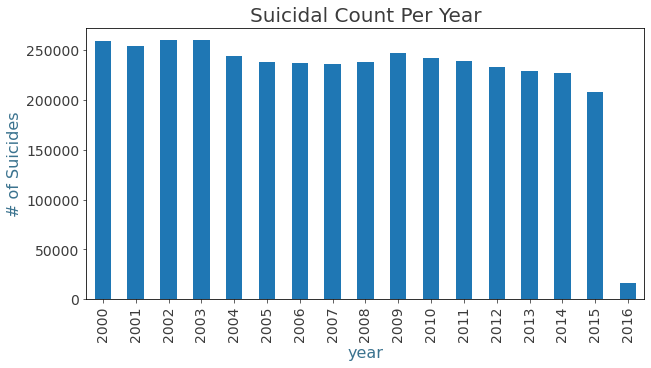

In [349]:
data1 = data.groupby('year')['suicides_no'].sum().plot(figsize=(10, 5), kind = 'bar')

#data1.xticks(rotation=45)
data1.set_title('Suicidal Count Per Year')
data1.set_ylabel('# of Suicides');

In [362]:
data2 = data.copy()
data2 = data2[['country','suicides_no']].groupby(['country']).agg('sum')
data2 =data2.nlargest(50,'suicides_no').sort_values(by = 'suicides_no', ascending = True)

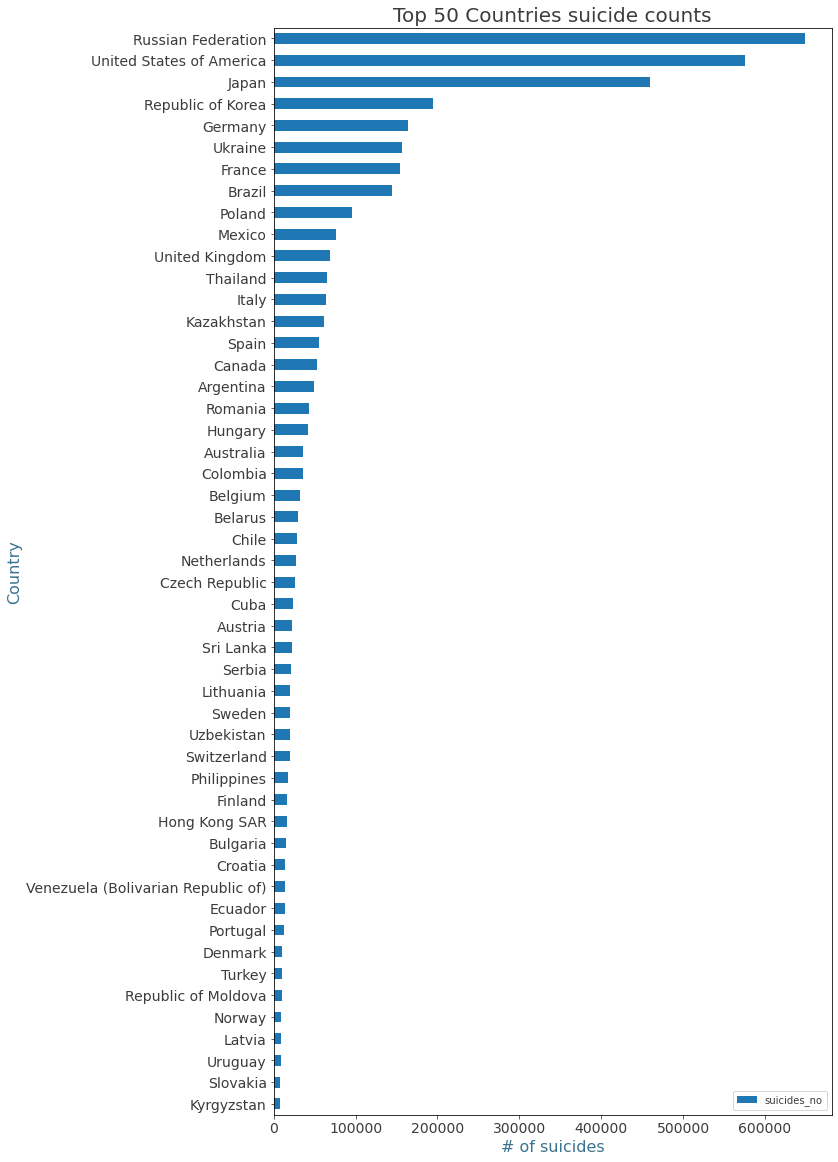

In [363]:
data2 = data2.plot(figsize=(10, 20), kind = 'barh')
data2.set_title('Top 50 Countries suicide counts')
data2.set_xlabel('# of suicides')
data2.set_ylabel('Country');

In [429]:
data3 = data.copy()
data3 = data3[['age','suicides_no']].groupby(['age']).agg('sum')
data3 =data3.sort_values(by = 'suicides_no', ascending = True)

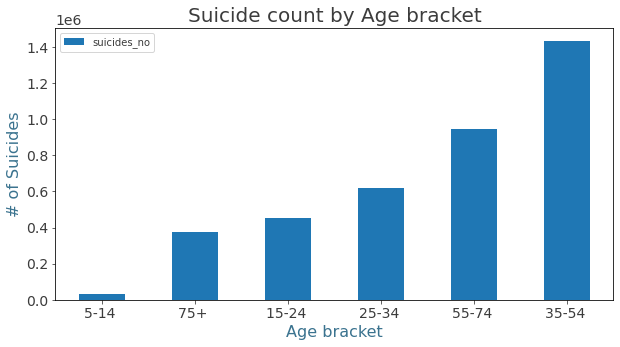

In [430]:
ax = data3.plot(figsize=(10, 5), kind = 'bar')
ax.set_title('Suicide count by Age bracket', fontsize=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')
ax.set_ylabel('# of Suicides')
ax.set_xlabel('Age bracket');

In [421]:
data4 = data.copy()
data4 = data4[['sex','suicides_no']].groupby(['sex']).agg('sum')
data4 =data4.sort_values(by = 'suicides_no', ascending = True)

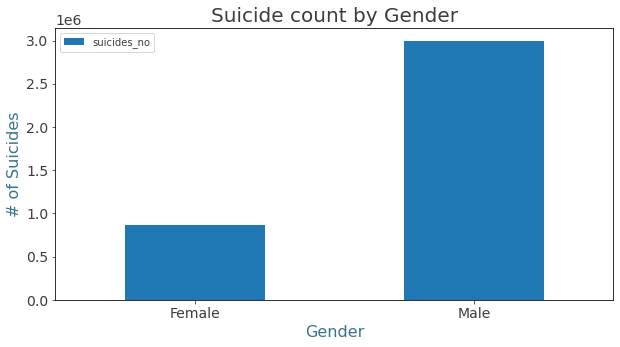

In [422]:
ax = data4.plot(figsize=(10, 5), kind = 'bar')
ax.set_title('Suicide count by Gender', fontsize=20)
ax.set_xticklabels(['Female','Male'], rotation=0, ha='center')
ax.set_ylabel('# of Suicides')
ax.set_xlabel('Gender');

In [ ]:
data4 = data.copy()
data4 = data4.groupby(['year','sex']).sum()
#data4 =data4.sort_values(by = 'suicides_no', ascending = True)
data4 = data4.drop('population',1);
data4
#df = df.drop('column_name', 1)

#### I tried to plot a grouped bar chart that shows the counts that were grouped by gender per year but I can't figure it out how.

#### Cant figure out how to save the char using code. Instead I just save it manually